In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from zipfile import ZipFile
import os, glob
import cv2
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from tensorflow.keras. layers import Conv2D, Flatten,Dense,MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow. keras.preprocessing. image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow. keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    MaxPooling2D,
    Dropout,
    BatchNormalization,
    Activation,
)

In [2]:
def load_data():
    X = []
    Y = []
    
    # Define flower categories and corresponding folder names
    categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    base_path = r"E:\Full Data Science Projects\Neural Netwroks\Flower Detection\Dataset\train"
    
    for category in categories:
        folder_path = f"{base_path}\\{category}\\*.jpg" # Path to all images in the folder
        for file in tqdm(glob.glob(folder_path)):
            img = cv2.imread(file)
            img = cv2.resize(img, (224, 224))  # Resize to desired size
            X.append(img)
            Y.append(category)  # Append the category name
    
    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Encode labels
    le = preprocessing.LabelEncoder()
    Y = le.fit_transform(Y)

    return X, Y, le

# Load data
X, Y, label = load_data()

100%|██████████| 607/607 [00:03<00:00, 179.40it/s]


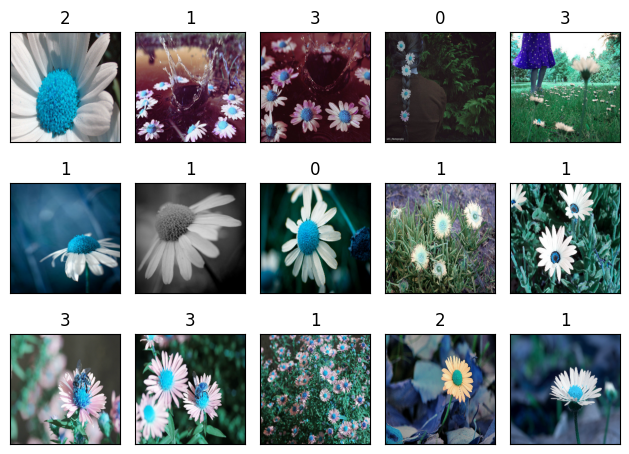

shape of X_train:  (224, 224, 3)
shape of X_test:  (224, 224, 3)
------------------------------------
number of samples in X_train:  2608
number of samples in X_test:  138


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i])
    plt.title(int(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

print("shape of X_train: ", X_train[0].shape)
print("shape of X_test: ", X_test[0].shape)
print('------------------------------------')
print("number of samples in X_train: ", len(X_train))
print("number of samples in X_test: ", len(X_test))

In [4]:
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(Y))  # Number of unique classes

y_train_one_hot = to_categorical(y_train, num_classes) # Convert labels to one-hot encoding

X_train = preprocess_input(X_train) # Preprocess the images to fit the ResNet50 model input

In [6]:
from tensorflow.keras.optimizers import Adam
# Load ResNet50 model, excluding the top layer
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x) 
predictions = Dense(num_classes, activation='softmax')(x) # adding the fully connected layer for the prediction
model = Model(inputs=base_model.input, outputs=predictions)# Combine base model and new classification layers

for layer in base_model.layers:# Freeze base model layers (since we're using transfer learning)
    layer.trainable = False 

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data using ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.15, horizontal_flip=True,
                             fill_mode="nearest")

# Train the model
model.fit(datagen.flow(X_train, y_train_one_hot, batch_size=32), epochs=10)

Epoch 1/10


c:\Users\SAHER MOHAMED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5770 - loss: 1.1361
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8452 - loss: 0.4095
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8727 - loss: 0.3446
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9058 - loss: 0.2564
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9117 - loss: 0.2551
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9153 - loss: 0.2280
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.9271 - loss: 0.2056
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9432 - loss: 0.1792
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9304 - loss: 0.1843
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9447 - loss: 0.1524


In [12]:
# predect X_test data
X_test = preprocess_input(X_test)
y_test_one_hot = to_categorical(y_test, num_classes)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [13]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8985507246376812


In [14]:
test = []
test_image_path = r"E:\Full Data Science Projects\Neural Netwroks\Flower Detection\Dataset\test\*.jpg"  # Specify file format, adjust if needed

for file in tqdm(glob.glob(test_image_path)):
    img = cv2.imread(file)
    
    if img is None:
        print(f"Error reading file: {file}") 
        continue  # Skip this file and move to the next one

    img = cv2.resize(img, (224, 224))
    test.append(img)

  0%|          | 0/924 [00:00<?, ?it/s]

100%|██████████| 924/924 [00:01<00:00, 477.62it/s]


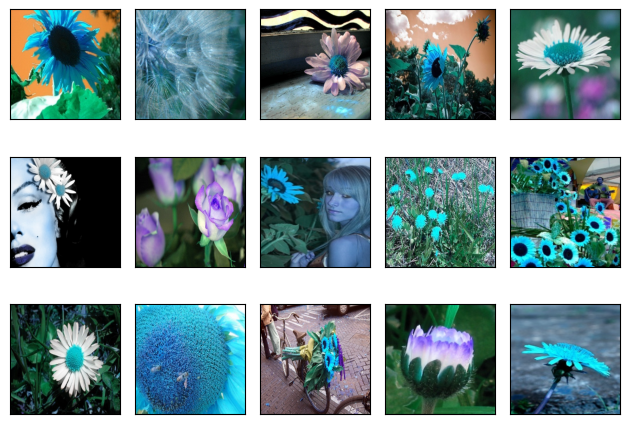

In [15]:
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(test[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


In [16]:
pred = model.predict(preprocess_input(np.array(test)))


29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step


In [17]:
pred = np.argmax(pred, axis=1)
pred = label.inverse_transform(pred) # Inverse transform the encoded class labels to their original form
np.save('predictions.npy', pred)

output = pd.DataFrame({'category': pred})
output.to_csv('submission.csv', index=False)